In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry', 'population', 'capacity_school']]
blocks_gdf = blocks_gdf.rename(columns={'capacity_school':'capacity'})
blocks_gdf.head()

,geometry,population,capacity
id,,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",606,0.0
1,"POLYGON ((355412.142 6623378.149, 355411.700 6...",41,0.0
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",14,0.0
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...",581,0.0
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",2004,0.0


In [2]:
import pandas as pd

accessibility_matrix = pd.read_pickle('./../data/accessibility_matrix.pickle')
accessibility_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,16310,16311,16312,16313,16314,16315,16316,16317,16318,16319
0,0.000000,18.718750,9.234375,17.21875,30.296875,27.390625,30.671875,23.281250,78.6875,81.2500,...,76.5625,102.5625,97.5000,132.250,130.8750,142.125,247.625,228.625,247.625,124.6250
1,17.859375,0.000000,19.015625,7.65625,20.281250,25.250000,25.234375,15.765625,76.8750,79.4375,...,74.6875,100.7500,95.6875,130.500,129.0000,140.250,245.875,226.875,245.875,112.5000
2,9.234375,20.796875,0.000000,20.21875,27.968750,25.062500,28.343750,20.953125,71.8750,74.4375,...,69.7500,95.8125,90.6875,125.500,124.0625,135.375,240.875,221.875,240.875,124.6250
3,15.937500,7.449219,18.421875,0.00000,21.109375,24.984375,27.781250,16.593750,76.3125,78.8125,...,74.1250,100.1875,95.0625,129.875,128.5000,139.750,245.250,226.250,245.250,113.3750
4,31.906250,19.765625,31.734375,21.28125,0.000000,21.781250,23.125000,15.429688,89.5625,92.1250,...,87.4375,113.5000,108.3750,143.125,141.7500,153.000,258.500,239.500,258.500,108.3125


## Competitive provision

In [3]:
demand = 120
accessibility = 15

In [4]:
from blocksnet.analysis.provision import competitive_provision

blocks_df, p_strong, p_weak = competitive_provision(blocks_gdf, accessibility_matrix, demand, accessibility, max_depth=1)

2025-03-04 21:21:43.541 | INFO     | blocksnet.analysis.provision.competivive.core:_initialize_provision_df:24 - Initializing provision DataFrame
2025-03-04 21:21:43.549 | INFO     | blocksnet.analysis.provision.competivive.core:_supply_self:50 - Supplying blocks with own capacities
2025-03-04 21:21:43.688 | INFO     | blocksnet.analysis.provision.competivive.core:competitive_provision:163 - Setting and solving LP problems until max depth or break condition reached
100%|██████████| 1/1 [00:15<00:00, 15.00s/it]
2025-03-04 21:21:58.695 | SUCCESS  | blocksnet.analysis.provision.competivive.core:competitive_provision:174 - Provision assessment finished


In [5]:
blocks_df.head()

,population,capacity,demand,demand_left,demand_within,demand_without,capacity_left,capacity_within,capacity_without,provision_strong
id,,,,,,,,,,
0,606,0,73,73,0,0,0,0,0,0.0
1,41,0,5,5,0,0,0,0,0,0.0
2,14,0,2,2,0,0,0,0,0,0.0
3,581,0,70,70,0,0,0,0,0,0.0
4,2004,0,240,144,96,0,0,0,0,0.4


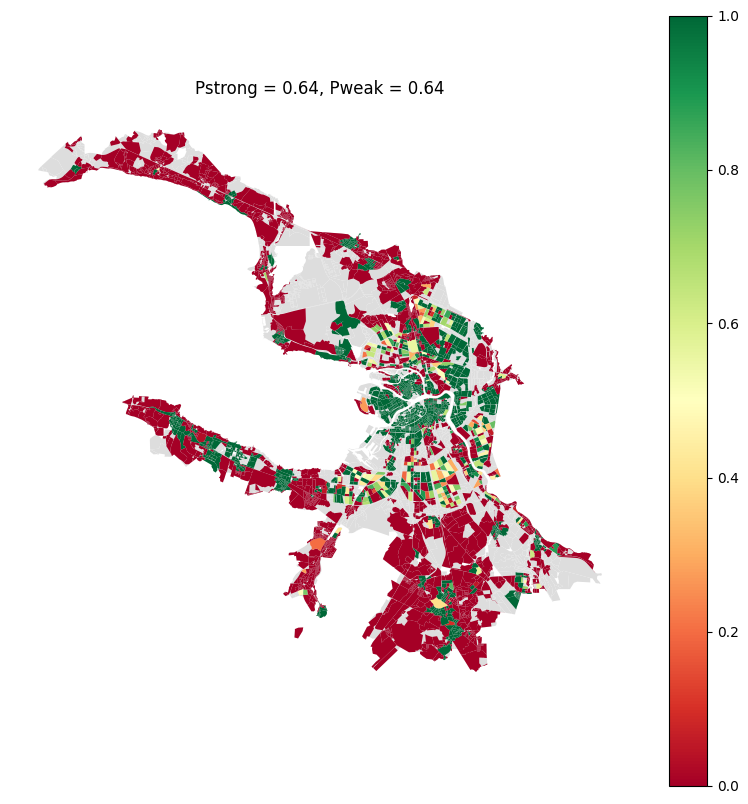

In [6]:
ax=blocks_gdf.plot(color='#ddd', figsize=(10,10))
blocks_gdf[['geometry']].join(blocks_df).plot(ax=ax, column='provision_strong', cmap='RdYlGn', vmin=0, vmax=1, legend=True)
ax.set_title(f'Pstrong = {round(p_strong, 2)}, Pweak = {round(p_weak, 2)}')
ax.set_axis_off()

## Shared provision

In [7]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/parks.parquet')
blocks_gdf.head()

,geometry,population,capacity
id,,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",606,0.0
1,"POLYGON ((355412.142 6623378.149, 355411.700 6...",41,0.0
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",14,0.0
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...",581,0.0
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",2004,0.0


In [8]:
from blocksnet.analysis.provision import shared_provision

accessibility = 30
blocks_df = shared_provision(blocks_gdf, accessibility_matrix, accessibility)

2025-03-04 21:22:02.022 | INFO     | blocksnet.analysis.provision.shared.core:_initialize_provision_df:17 - Initializing provision DataFrame


2025-03-04 21:22:04.135 | SUCCESS  | blocksnet.analysis.provision.shared.core:shared_provision:65 - Provision assessment finished


In [9]:
blocks_df.head()

,population,capacity,capacity_within,population_within,load,provision
id,,,,,,
0,606,0,0,66108,NaN,0.0
1,41,0,0,136140,NaN,0.0
2,14,0,0,70975,NaN,0.0
3,581,0,0,126898,NaN,0.0
4,2004,0,0,95421,NaN,0.0


`Provision` - how much capacity within the accessibility is provided per resident of the block

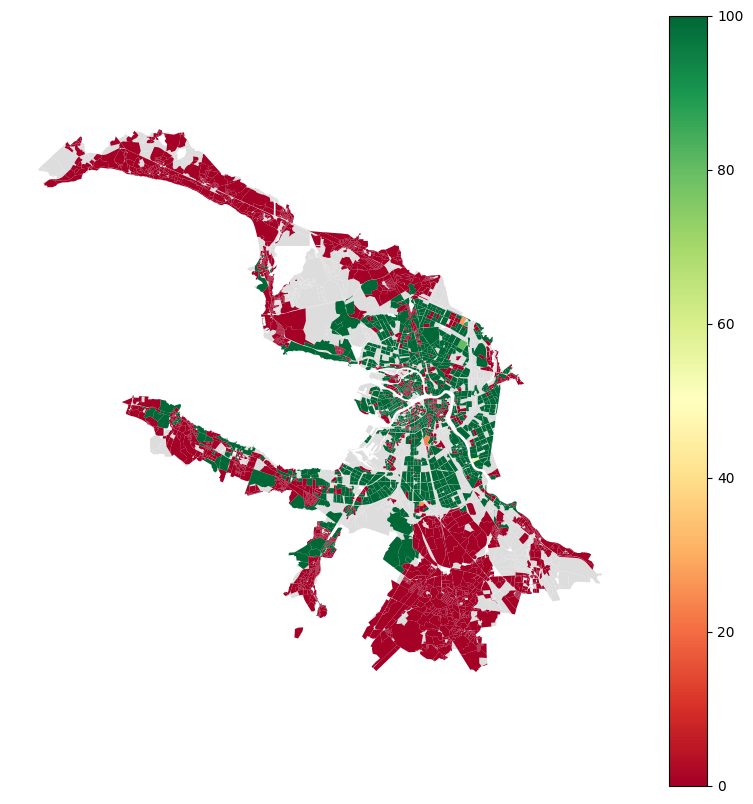

In [10]:
ax=blocks_gdf.plot(color='#ddd', figsize=(10,10))
blocks_gdf[['geometry']].join(blocks_df).plot(ax=ax, column='provision', cmap='RdYlGn', vmin=0, vmax=100, legend=True).set_axis_off()

`Load` - how much population within the accessibility is provided by the capacity of the block

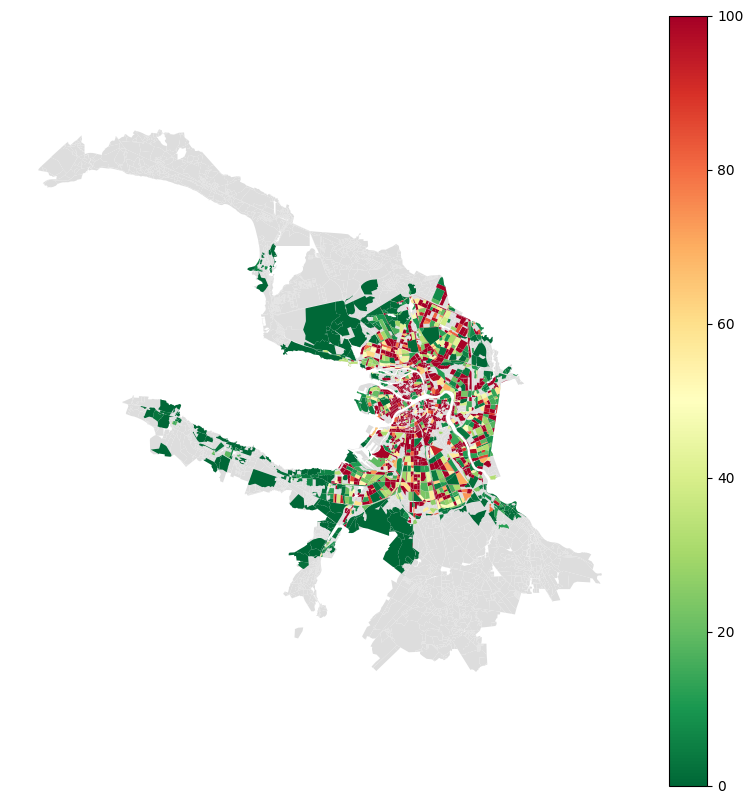

In [11]:
ax=blocks_gdf.plot(color='#ddd', figsize=(10,10))
blocks_gdf[['geometry']].join(blocks_df).plot(ax=ax, column='load', cmap='RdYlGn_r', vmin=0, vmax=100, legend=True).set_axis_off()